<a href="https://colab.research.google.com/github/Leticia-Moraes-Souza/MVP_Analise_de_Dados_e_Boas_Praticas-/blob/main/MVP_Telecom_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Apresentação do problema
O dataset "Telecom Customer Churn Prediction" foi escolhido para a construção do MVP da disciplina de "Análise de dados e boas práticas". Ele pode ser encontrado no repositório Kaggle no link: https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics/ e originalmente fazia parte de um desafio conduzido pela Maven Analytics (https://www.mavenanalytics.io/blog/maven-churn-challenge). Nele, estão contidas as informações de todos os clientes que em 2022 tinham serviços de telefonia ou internet contratados em uma empresa fictícia de Telecomunicações da California. O conjunto de dados foi integralmente carregado no repositório Github para uso nesse modelo.

Como a variável de interesse, representada na coluna "Customer Status", já está presente na base de dados, espera-se construir um modelo de aprendizado supervisionado com o objetivo de prever se um cliente permanecerá usando os produtos ou efetuará um cancelamento (churn). Como hipóteses, temos as possíveis perguntas:

1.	clientes pouco fidelizados (que possuem apenas um serviço - telefonia ou internet) tendem a apresentar maior taxa de cancelamento
2.	clientes que contrataram serviço de internet de tecnologias ultrapassadas (ex:cabo) cancelam mais seus produtos
3.	clientes que gastam mais com mensalidade apresentam maior churn
4.	os cancelamentos estão concentrados em algumas cidades

Espera-se que com as repostas para essas perguntas seja possível prever quais usuários estão propensos ao churn e assim traçar estratégias de retenção e, consequentemente, evitar o cancelamento.


# 2) Apresentação dos atributos do dataset
No conjunto de dados usados temos os seguintes atributos:

  •	Customer ID: código para identificação do cliente

  •	Gender: gênero (feminino ou masculino)

  •	Age: idade

  •	Married: informa se o cliente é casado ou não

  •	Number of Dependents: número de dependentes que vivem com o cliente

  •	City: cidade de residência

  •	Zip code: CEP

  •	Latitude: latitude em graus

  •	Longitude: longitude em graus

  •	Number of referrals: número de vezes que os clientes recomendaram os serviços da empresa para outras pessoas

  •	Tenure in months: tempo de permanência como cliente na empresa em meses

  •	Offer: indica o tipo de oferta feita pelo marketing contratada pelo cliente

  •	Phone service: indica se o cliente tem o serviço de telefonia fixa

  •	Avg Monthly Long Distance Charges: indica o valor médio pago por ligações de longa distância (dólares)

  •	Multiple lines: indica se o cliente tem múltiplas linhas telefônicas contratadas

  •	Internet service: indica se o cliente tem serviços de internet contratados

  •	Internet type: tipo de tecnologia de conexão para a internet

  •	Avg Monthly GB Download: indica a média de gigabites baixados pelo cliente

  •	Online security: indica se o cliente contratou um serviço extra de segurança online

  •	Online backup: indica se o cliente contratou um serviço extra de backup online

  •	Device protection plan: indica se o cliente contratou um serviço extra de proteção para seu equipamento de internet

  •	Premium tech support: indica se o cliente contratou um serviço extra de suporte técnico

  •	Streaming tv: indica se o cliente usa o serviço de internet para acesso a plataformas de streaming de tv

  •	Streaming movies: indica se o cliente usa o serviço de internet para acesso a plataformas de streaming de filmes

  •	Streaming music: indica se o cliente usa o serviço de internet para acesso a plataformas de streaming de música

  •	Unlimited data: indica se o cliente paga um valor adicional para ter acesso a dados ilimitados de internet para download e upload

  •	Contract: tipo de contrato do cliente (mensal, anual, etc)

  •	Parpeless Billing: indica se o tipo de cobrança é sem envio de boleto impresso

  •	Payment method: método de pagamento usado pelo cliente (ex: cartão de crédito)

  •	Total charges: valor total cobrado do cliente (dólar)

  •	Total refunds: valor de reembolso pago aos clientes (dólar)

  •	Total Extra Data Charges: valor extra cobrado pelo download extra de dados, além do especificado no plano contratado (dólar)

  •	Total Long Distance Charges: valor extra cobrado pelas ligações de longa distância (dólar)

  •	Total revenue: total de receita obtida pela empresa com cada cliente (dólar)

  •	Customer status: indica o estado do cliente na empresa: Joined (cliente novo), stayed (permaneceu como cliente), churned (cancelou os produtos)

  •	Churn category: macro motivos que levaram os clientes a cancelarem os seus produtos
  
  •	Churn reason: motivos detalhados que levaram ao cancelamento dos produtos





# 3) Análise do dataset

Primeiramente, vamos observar como esse dataset está organizado e suas principais características.

## 3.1) Importação das bibliotecas

Para iniciar a análise, começamos com a importação das bibliotecas Python que serão usadas.

In [718]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.model_selection import train_test_split

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


## 3.2) Importação do dataset
Para esse MVP, a tabela principal "telecom_customer_churn", disponibilizada no repositório online, foi carregada no Github com formato csv. Com o pacote Pandas, será realizada a carga do arquivo para análise.

In [719]:
# importação do dataset "Telecom Churn"

# url a ser importada
url_dados = "https://raw.githubusercontent.com/Leticia-Moraes-Souza/MVP_Analise_de_Dados_e_Boas_Praticas-/main/telecom_customer_churn.csv"
# carga do dataset através da url
df = pd.read_csv(url_dados)


# verificando se churn é um dataframe
type(df)

pandas.core.frame.DataFrame

## 3.3) Análises iniciais
Após a importação da base, vamos conferir se os dados foram carregados com sucesso, exibindo suas primeiras e últimas linhas como exemplo.

In [720]:
# exibindo primeiras 10 linhas do dataframe
df.head(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN


In [721]:
# exibindo 10 últimas linhas do dataframe
df.tail(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
7033,9975-SKRNR,Male,24,No,0,Sierraville,96126,39.559709,-120.345639,0,...,Credit Card,18.90,18.90,0.0,0,49.51,68.41,Joined,NaN,NaN
7034,9978-HYCIN,Male,72,Yes,1,Bakersfield,93301,35.383937,-119.020428,1,...,Bank Withdrawal,84.95,4018.05,0.0,80,1987.63,6085.68,Stayed,NaN,NaN
7035,9979-RGMZT,Female,20,No,0,Los Angeles,90022,34.023810,-118.156582,0,...,Credit Card,94.05,633.45,0.0,0,255.43,888.88,Stayed,NaN,NaN
7036,9985-MWVIX,Female,53,No,0,Hume,93628,36.807595,-118.901544,0,...,Credit Card,70.15,70.15,0.0,0,42.09,112.24,Churned,Competitor,Competitor had better devices
7037,9986-BONCE,Female,36,No,0,Fallbrook,92028,33.362575,-117.299644,0,...,Bank Withdrawal,20.95,85.50,0.0,0,8.04,93.54,Churned,Competitor,Competitor made better offer
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.0,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed,NaN,NaN
7042,9995-HOTOH,Male,36,Yes,0,Sierra City,96125,39.600599,-120.636358,1,...,Bank Withdrawal,59.00,3707.60,0.0,0,0.00,3707.60,Stayed,NaN,NaN


Podemos notar que as informações foram carregadas com sucesso, apesar de não terem sido exibidas todos os cabeçalhos de coluna na amostra de exemplo. Também já podemos notar que nesse conjunto de dados, existem variáveis categóricas (ex: City) e numéricas (ex: Age). Além disso, aparentemente há casos de missings (valores NAN na coluna "Churn category").

Vamos continuar olhando mais algumas características gerais desse conjunto de dados, como suas dimensões, os atributos presentes e tipos de atributos.

In [722]:
# mostrando as dimensões do dataset (quantidades de linhas, colunas)
df.shape

(7043, 38)

In [723]:
# exibindo o nome das colunas
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [724]:
# mostrando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

De acordo com as análises iniciais percebe-se que o dataframe "churn" possui 38
colunas e 7043 linhas. Novamente, observamos possíveis missings nas colunas que possuem menor contagem de valores não nulos. A maioria dos dados são do tipo object e há dados numéricos inteiros (int) e decimais (float).

Vamos analisar então algumas estatísticas descritivas das variáveis numéricas.

In [725]:
 # resumo estatistico do dataset
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


Aqui, um ponto de atenção é a presença de valores negativos na coluna "Monthly Charge", uma vez que o valor mínimo presente nesse campo é -10, o que pode indicar a presença de valores que deverão ser desconsiderados ou substituídos na análise.

Vamos verificar também se as classes do dataset estão balanceadas ou se será necessário algum tratamento posterior.

In [726]:
# verificando a distribuição das classes
df.groupby("Customer Status").size()

Customer Status
Churned    1869
Joined      454
Stayed     4720
dtype: int64

Podemos observar que as classes estão desbalanceadas com uma concentração maior de clientes que permaneceram (Stayed) usando os produtos contratados. É importante levar essa informação em consideração ao separar o conjunto de dados entre conjunto de treino e teste.

# 4) Visualizações
Vamos plotar algumas visões para melhor observar as características do dataset.

Para deixar as visualizações mais claras, vamos remover algumas colunas que possuem informações mais detalhadas, mas que não estão relacionadas as hipóteses do problema.
Também vamos retirar o status "Joined" pois nesse momento não estamos interessados em observar o comportamento de clientes novos.

In [727]:
# retirando colunas com informações desnecessárias para essa análise
telecom = df.drop(columns = ["Customer ID", "Zip Code", "Latitude", "Longitude", "Number of Dependents","Married"], axis = 0)
# conferindo primeiras linhas do dataframe com o tratamento
telecom.head()


,Gender,Age,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,Frazier Park,2,9,None,Yes,42.39,No,Yes,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,Male,46,Glendale,0,9,None,Yes,10.69,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Male,50,Costa Mesa,0,4,Offer E,Yes,33.65,No,Yes,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,Martinez,1,13,Offer D,Yes,27.82,No,Yes,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,Camarillo,3,3,None,Yes,7.38,No,Yes,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [728]:
#retirando status "Joined"
telecom = telecom[telecom["Customer Status"] != "Joined"]
# verificando a distribuição das classes
telecom.groupby("Customer Status").size()

Customer Status
Churned    1869
Stayed     4720
dtype: int64

## 4.1) Visualizações de variáveis numéricas

Primeiramente vamos plotar histogramas para observar como as variáveis numéricas estão distribuídas.

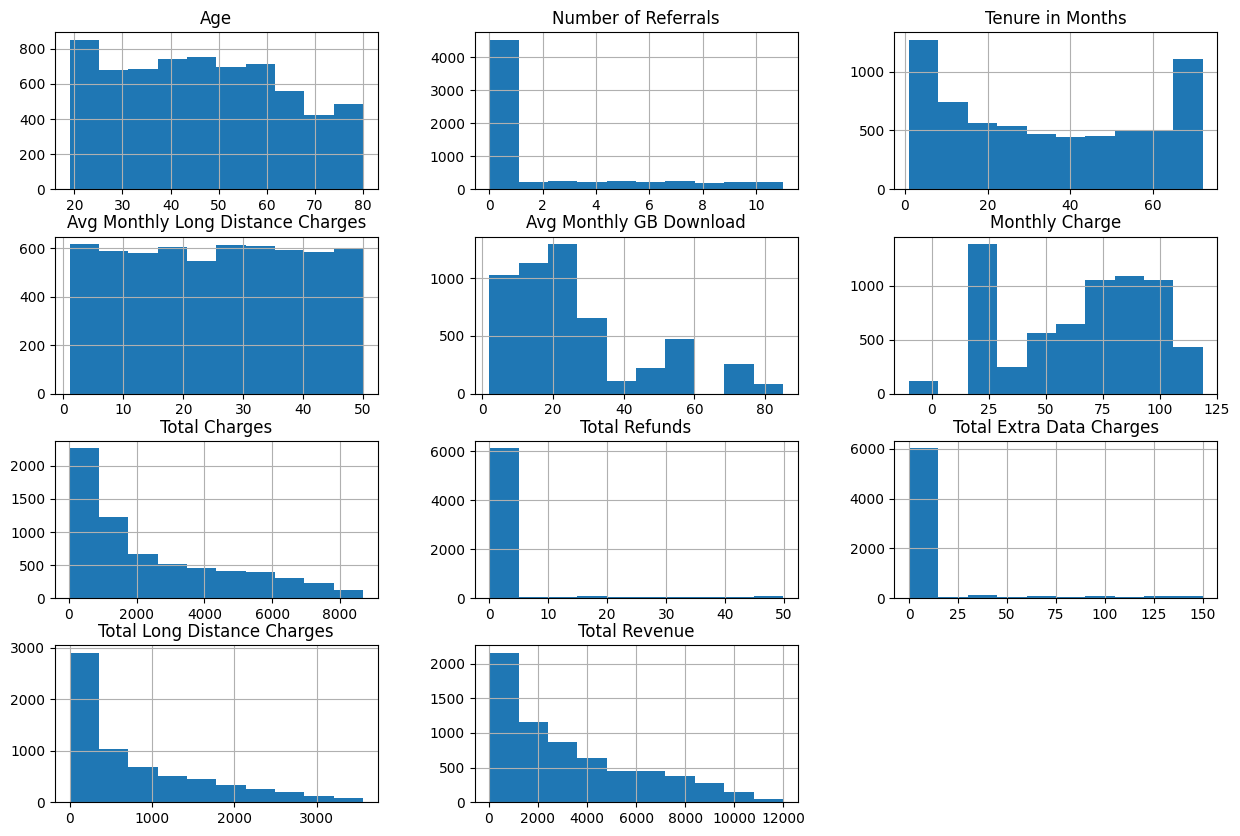

In [729]:
# histogramas
telecom.hist(figsize = (15,10))
plt.show()

Por meio da visualização das variáveis numéricas em histogramas, vemos que as variáveis "Total charge", "Total long distance charges" e "Total revenue" seguem uma distribuição aproximadamente exponencial, "Avg long distance charges" parece ter uma distribuição uniforme e que nenhuma variável apresenta distribuição normal.

Vamos plotar também os box plot que permitem a visualização dos quartis e outliners, permitindo ver a dispersão dos dados.

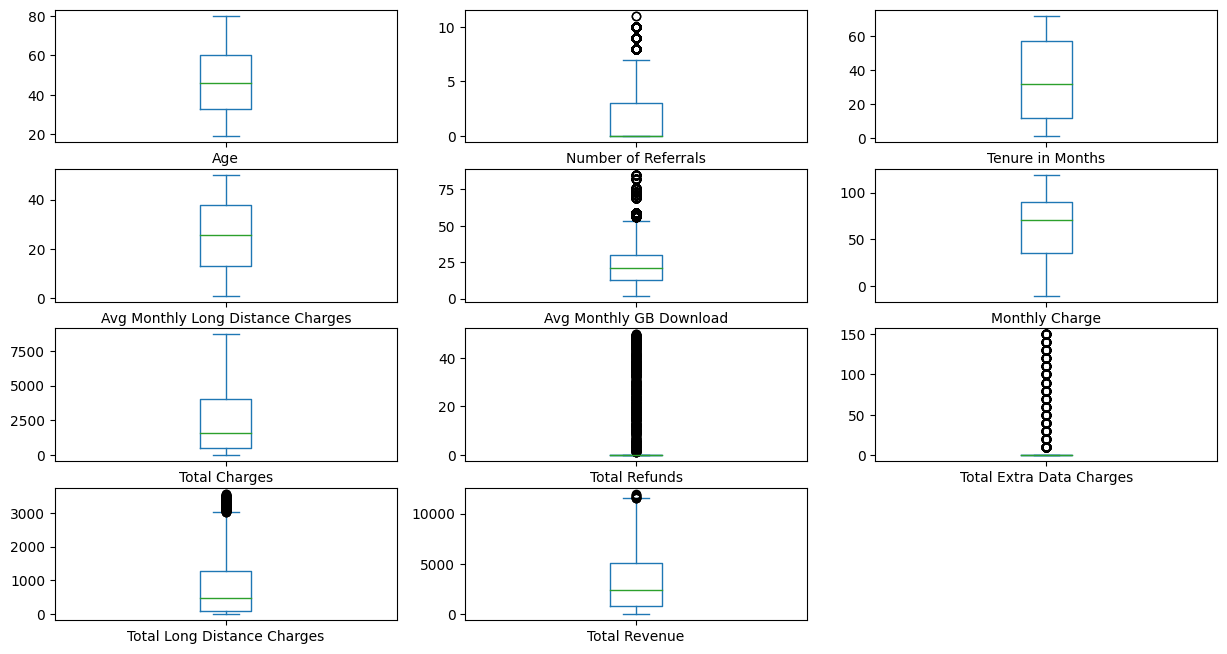

In [730]:
# box plot
telecom.plot(kind = "box", subplots = True, layout = (5,3), figsize = (15,10) )
plt.show()

Aqui é possível observar que aparentemente as variáveis "Age", "Tenure in months", "Avg monthly long distance charges", estão bem distribuídas em torno da média (2° quarti). Contudo, os dados apresentam diferentes dispersões e algumas variáveis ("Number of referrals, Avg monthly GB download", "Total refunds", "Total extra data charges", "Total long distance carges" e "Total revenue") apresentam possíveis outliners.

Para ver se as variáveis numéricas estão relacionadas entre si, vamos plotar uma matriz de correlação.
Como a variável de interesse é categórica, vamos também transformar seus valores para ser possível observar o comportamento na correlação.

In [731]:
# Configurando colunas para cada uma das categorias de Customer Status
telecom['Churned'] = telecom['Customer Status'].apply(lambda x:1 if x=='Churned' else 0)
telecom['Stayed'] = telecom['Customer Status'].apply(lambda x:1 if x=='Stayed' else 0)
# Conferindo o dataset com as novas colunas
telecom.head()

,Gender,Age,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Churned,Stayed
0,Female,37,Frazier Park,2,9,None,Yes,42.39,No,Yes,...,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,0,1
1,Male,46,Glendale,0,9,None,Yes,10.69,Yes,Yes,...,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,0,1
2,Male,50,Costa Mesa,0,4,Offer E,Yes,33.65,No,Yes,...,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,1,0
3,Male,78,Martinez,1,13,Offer D,Yes,27.82,No,Yes,...,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,1,0
4,Female,75,Camarillo,3,3,None,Yes,7.38,No,Yes,...,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,1,0


<Axes: >

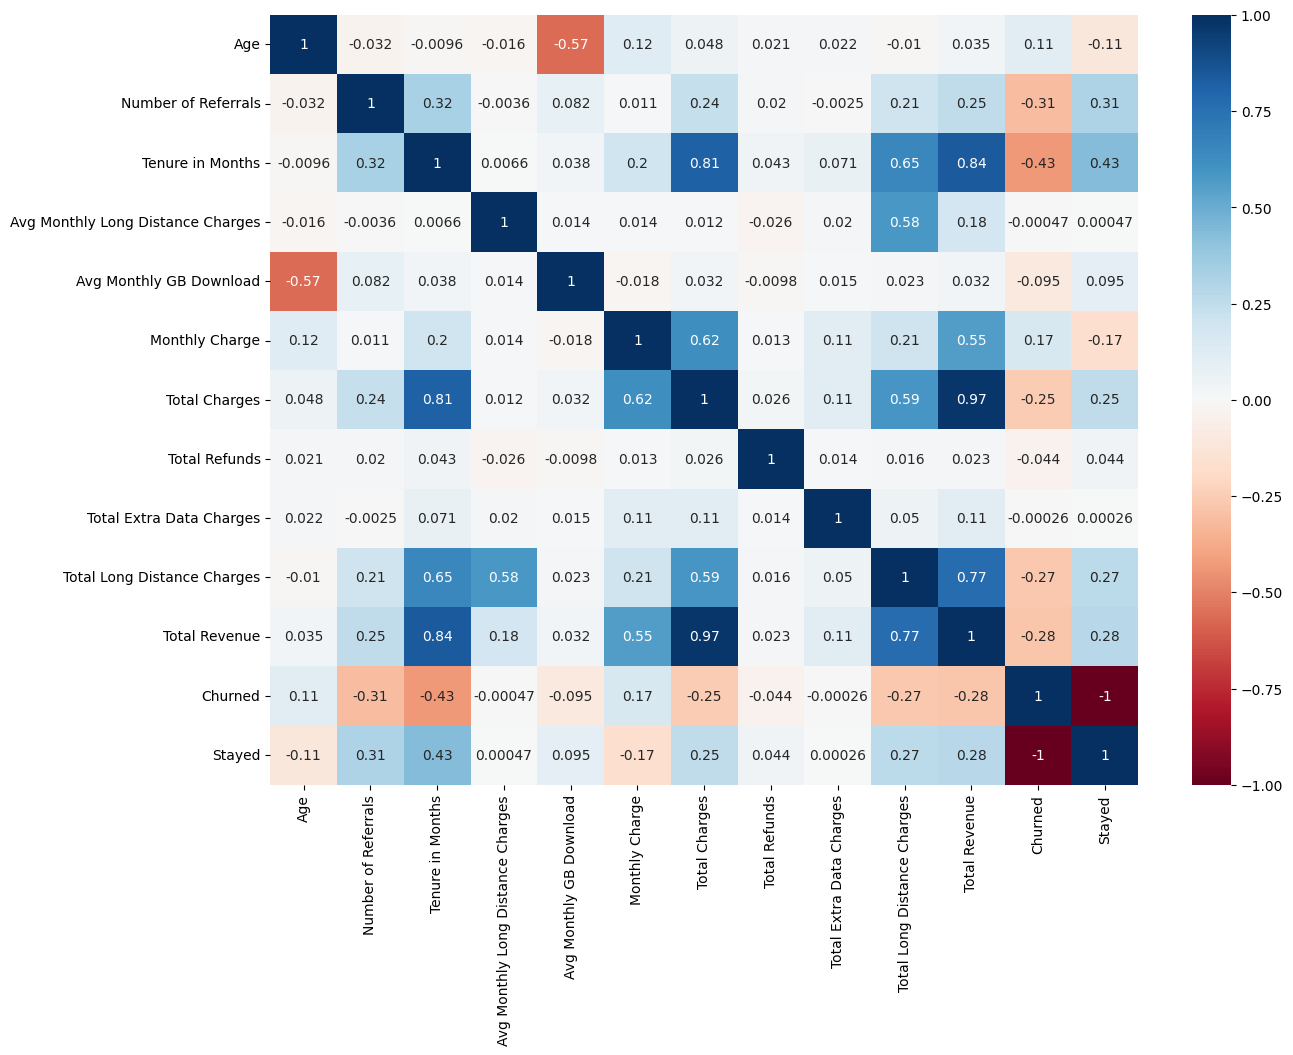

In [732]:
# matriz de correlação
plt.figure(figsize = (14,10))
sns.heatmap(telecom.corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax = 1 )

Considerando os ranges de valores que determinam se uma correlação é fraca, média ou forte (http://leg.ufpr.br/~silvia/CE003/node74.html) como sendo:


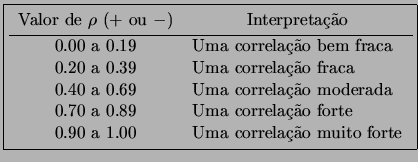

Podemos observar que o churn está muito fracamente relacionado de forma positiva com a idade (Age) e os valores cobrados na mensalidade (Monthly charge). Além disso, está fracamente relacionado negativamente com o número de indicações (Number of referrals), o tempo de permanência na empresa (Tenure in Months), o valor total de cobranças (Total charges), o valor total cobrado por ligações de longa distância (Total long distance charges) e o total de receita (Total Revenue).

Vamos observar então quanto é a média de cada uma dessas variáveis e como é a sua média em cada categoria do Customer Status.

In [733]:
# idade média dos clientes
Idade_Media = telecom['Age'].mean()
print(f"Idade média dos clientes {Idade_Media:,.2f}")
# idade média agrupada por status do cliente
Idade_Media_Agrupada = telecom['Age'].groupby(telecom['Customer Status']).mean()
print("Idade média dos clientes agrupada por status:")
print(Idade_Media_Agrupada)

# mensalidade média dos clientes
Mensalidade_Media = telecom['Monthly Charge'].mean()
print(f"\nMensalidade média dos clientes {Mensalidade_Media:,.2f}")
# mensalidade média agrupada por status do cliente
Mensalidade_Media_Agrupada = telecom['Monthly Charge'].groupby(telecom['Customer Status']).mean()
print("Mensalidade média dos clientes agrupada por status:")
print(Mensalidade_Media_Agrupada)

# quantidade média de indicações
Indicacoes_Media = telecom['Number of Referrals'].mean()
print(f"\nQuantidade média de indicações {Indicacoes_Media:,.2f}")
# quantidade média de indicações agrupada por status do cliente
Indicacoes_Media_Agrupada = telecom['Number of Referrals'].groupby(telecom['Customer Status']).mean()
print("Quantidade média de indicações agrupada por status:")
print(Indicacoes_Media_Agrupada)

# tempo médio de permanência dos clientes
Tempo_Medio = telecom['Tenure in Months'].mean()
print(f"\nTempo médio de permanência dos clientes {Tempo_Medio:,.2f}")
# tempo médio de permanência agrupada por status do cliente
Tempo_Medio_Agrupado = telecom['Tenure in Months'].groupby(telecom['Customer Status']).mean()
print("Tempo médio de permanência dos clientes agrupado por status:")
print(Tempo_Medio_Agrupado)

# média do valor total cobrado dos clientes
Valor_Medio = telecom['Total Charges'].mean()
print(f"\nValor médio cobrado dos clientes {Valor_Medio:,.2f}")
# média do valor total cobrado dos clientes, agrupada por status do cliente
Valor_Medio_Agrupado = telecom['Total Charges'].groupby(telecom['Customer Status']).mean()
print(f"Valor médio cobrado dos clientes agrupado por status:")
print(Valor_Medio_Agrupado)

# média do valor cobrado  dos clientes por ligações de longa distância
Valor_Medio_Ligacoes = telecom['Total Long Distance Charges'].mean()
print(f"\nValor médio cobrado dos clientes devido a ligações de longa distância {Valor_Medio_Ligacoes:,.2f}")
# média do valor cobrado dos clientes por ligações de longa distância, agrupada por status do cliente
Valor_Medio_Ligacoes_Agrupado = telecom['Total Long Distance Charges'].groupby(telecom['Customer Status']).mean()
print(f"Valor médio cobrado dos clientes devido a ligações de longa distância, agrupado por status:")
print(Valor_Medio_Ligacoes_Agrupado)

# receita média arrecadada
Receita_Media = telecom['Total Revenue'].mean()
print(f"\nValor médio de receita arrecadada {Receita_Media:,.2f}")
# receita média arrecadada, agrupada por status do cliente
Receita_Media_Agrupado = telecom['Total Revenue'].groupby(telecom['Customer Status']).mean()
print(f"Valor médio de receita arrecadada, agrupado por status:")
print(Valor_Medio_Ligacoes_Agrupado)

Idade média dos clientes 46.76
Idade média dos clientes agrupada por status:
Customer Status
Churned    49.735688
Stayed     45.582415
Name: Age, dtype: float64

Mensalidade média dos clientes 65.03
Mensalidade média dos clientes agrupada por status:
Customer Status
Churned    73.347592
Stayed     61.737415
Name: Monthly Charge, dtype: float64

Quantidade média de indicações 2.02
Quantidade média de indicações agrupada por status:
Customer Status
Churned    0.521134
Stayed     2.614831
Name: Number of Referrals, dtype: float64

Tempo médio de permanência dos clientes 34.50
Tempo médio de permanência dos clientes agrupado por status:
Customer Status
Churned    17.979133
Stayed     41.041525
Name: Tenure in Months, dtype: float64

Valor médio cobrado dos clientes 2,432.04
Valor médio cobrado dos clientes agrupado por status:
Customer Status
Churned    1531.796094
Stayed     2788.516831
Name: Total Charges, dtype: float64

Valor médio cobrado dos clientes devido a ligações de longa distân

Pode-se perceber que, para os clientes que cancelaram produtos, a média da idade e dos valores de mensalidade estão acima da média geral, enquanto a média da quantidade de indicações, do tempo de permanência, do valor total cobrado, do valor cobrado por ligações de longa distância e da receita arrecada estão abaixo da média geral.

## 4.2) Visualização de variáveis categóricas
Vamos também visualizar como estão distribuídas as variáveis categóricas de interesse entre seus possíveis valores.
Aqui vamos focar nas variáveis que estão relacionadas a primeira hipótese:

1.	clientes pouco fidelizados (que possuem apenas um serviço - telefonia ou internet) tendem a apresentar maior taxa de cancelamento

Ou seja, vamos visualizar as informações das colunas "Phone Service" e "Internet Service".

Primeiramente, vamos analisar o atributo "Phone Service":

Text(0.5, 1.0, '% clientes sem serviço de telefonia por status')

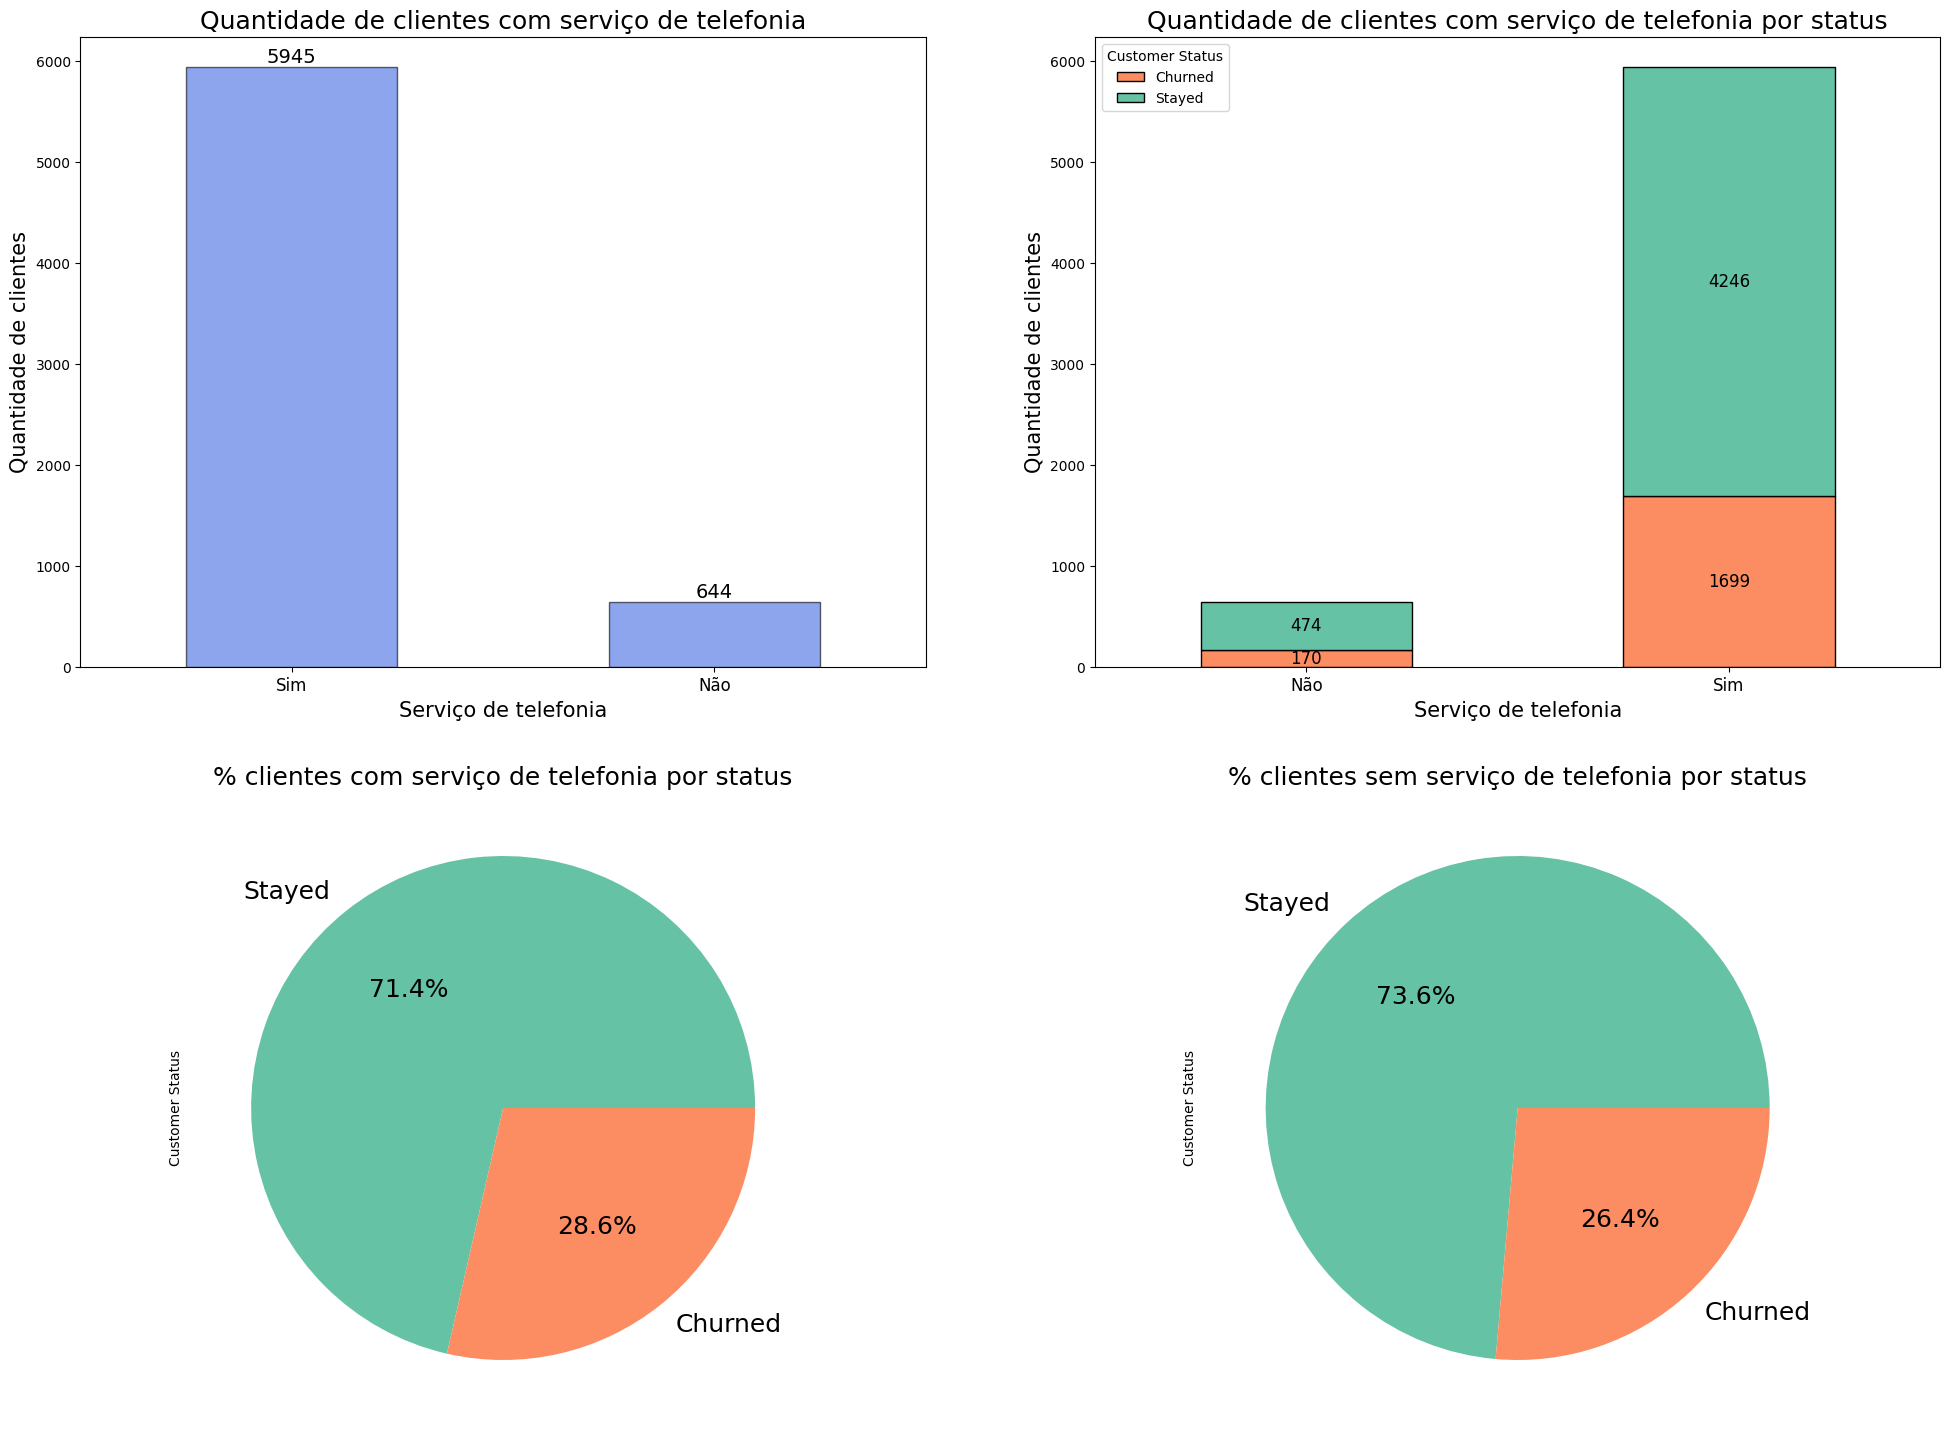

In [734]:
# Prepara a figura com largura 24 e altura 18 (em polegadas)
fig = plt.figure(figsize = (24, 18))


# Indica que estamos definindo o primeiro gráfico da figura
ax1 = fig.add_subplot(2, 2, 1)
# Contagem dos valores presentes nas categorias da coluna Phone Service
# e armazenamento na variável "Phone_Service"
Phone_Service = telecom['Phone Service'].value_counts()
# Renomeando as categorias da variável Phone_Service
Phone_Service.rename({'Yes':'Sim',
                     'No':'Não'},
                     inplace = True)
# Plota o gráfico de barras com a quantidade de clientes por instância da coluna Phone Service
# na primeira posição da figura
Phone_Service.plot.bar(color = 'royalblue',ec = "k", alpha = .6)
# Acrescenta título no eixo x
ax1.set_xlabel('Serviço de telefonia', fontsize=15)
# Acrescenta rótulos no eixo x
ax1.tick_params(axis="x", labelsize=12, rotation = 360)
# Acrescenta título no eixo y
ax1.set_ylabel('Quantidade de clientes', fontsize=15)
# Acrescenta título no gráfico de barras
ax1.set_title("Quantidade de clientes com serviço de telefonia", fontsize = 18)
# Acrescenta valor no gráfico de barras
ax1.bar_label(ax1.containers[0], fmt="%.0f", fontsize = 14)


# Indica que estamos definindo o segundo gráfico da figura
ax2 = fig.add_subplot(2, 2, 2)
# Contagem dos valores presentes nas categorias da coluna Phone Service agrupados de acordo
# com os Status do Cliente (variável de interesse) e armazenamento na variável "Phone_Service_Status"
Phone_Service_Status = telecom['Customer Status'].groupby(telecom['Phone Service']).value_counts()
# Renomeando as categorias da variável Phone_Service_Status
Phone_Service_Status.rename({'Yes':'Sim',
                             'No':'Não'
                             },
                            inplace = True)
# Plota o gráfico de barras com a quantidade de clientes por instância da coluna Phone Service, agrupados por status
Phone_Service_Status.unstack().plot.bar(color= ['#fc8d62','#66c2a5'], ec = 'k', stacked = True, ax = ax2 )
# Acrescenta título no eixo x
ax2.set_xlabel('Serviço de telefonia', fontsize=15)
# Acrescenta rótulos no eixo x
ax2.tick_params(axis="x", labelsize=12, rotation = 360)
# Acrescenta título no eixo y
ax2.set_ylabel('Quantidade de clientes', fontsize=15)
# Acrescenta título no gráfico de barras
ax2.set_title("Quantidade de clientes com serviço de telefonia por status", fontsize = 18)
# Acrescenta valor no gráfico de barras
ax2.bar_label(ax2.containers[0], fmt="%.0f", fontsize = 12, label_type = 'center')
ax2.bar_label(ax2.containers[1], fmt="%.0f", fontsize = 12, label_type = 'center')


# Indica que estamos definindo o terceiro gráfico da figura
ax3 = fig.add_subplot(2, 2, 3)
# Criando dataset para separar apenas os clientes que usam serviço de telefonia
Yes_Phone_Service = telecom[telecom["Phone Service"]== "Yes"]
# Contagem dos valores presentes nas categorias da coluna Customer Status
Phone_Service_Yes = Yes_Phone_Service['Customer Status'].value_counts()
# Plota o gráfico de pizza com o % de clientes com telefonia por status
Phone_Service_Yes.plot.pie(autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'], fontsize = 18, ax = ax3 )
# Acrescenta título no gráfico de barras
ax3.set_title("% clientes com serviço de telefonia por status", fontsize = 18)


# Indica que estamos definindo o quarto gráfico da figura
ax4 = fig.add_subplot(2, 2, 4)
# criando dataset para separar apenas os clientes que não possuem serviço de telefonia
No_Phone_Service = telecom[telecom["Phone Service"]== "No"]
# Contagem dos valores presentes nas categorias da coluna Customer Status
Phone_Service_No = No_Phone_Service['Customer Status'].value_counts()
# Plota o gráfico de pizza com o % de clientes sem telefonia por status
Phone_Service_No.plot.pie(autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'], fontsize = 18, ax = ax4 )
# Acrescenta título no gráfico de barras
ax4.set_title("% clientes sem serviço de telefonia por status", fontsize = 18)


Podemos observar que as classes do atributo "Phone Service" também estão desbalanceadas, com maior quantidade de clientes com serviço de telefonia do que sem.
O segundo gráfico de barras mostra a distribuição desses clientes por status, ressaltando que mais clientes mantiveram seus produtos do que cancelaram em ambas as classes.
Em porcentagens, fica mais claro que, proporcionalmente, a quantidade de clientes que cancelaram seus produtos é semelhante entre aqueles possuíam ou não serviço de telefonia.

Vamos repetir a análise para a colunas "Internet Service".

Text(0.5, 1.0, '% clientes sem serviço de internet por status')

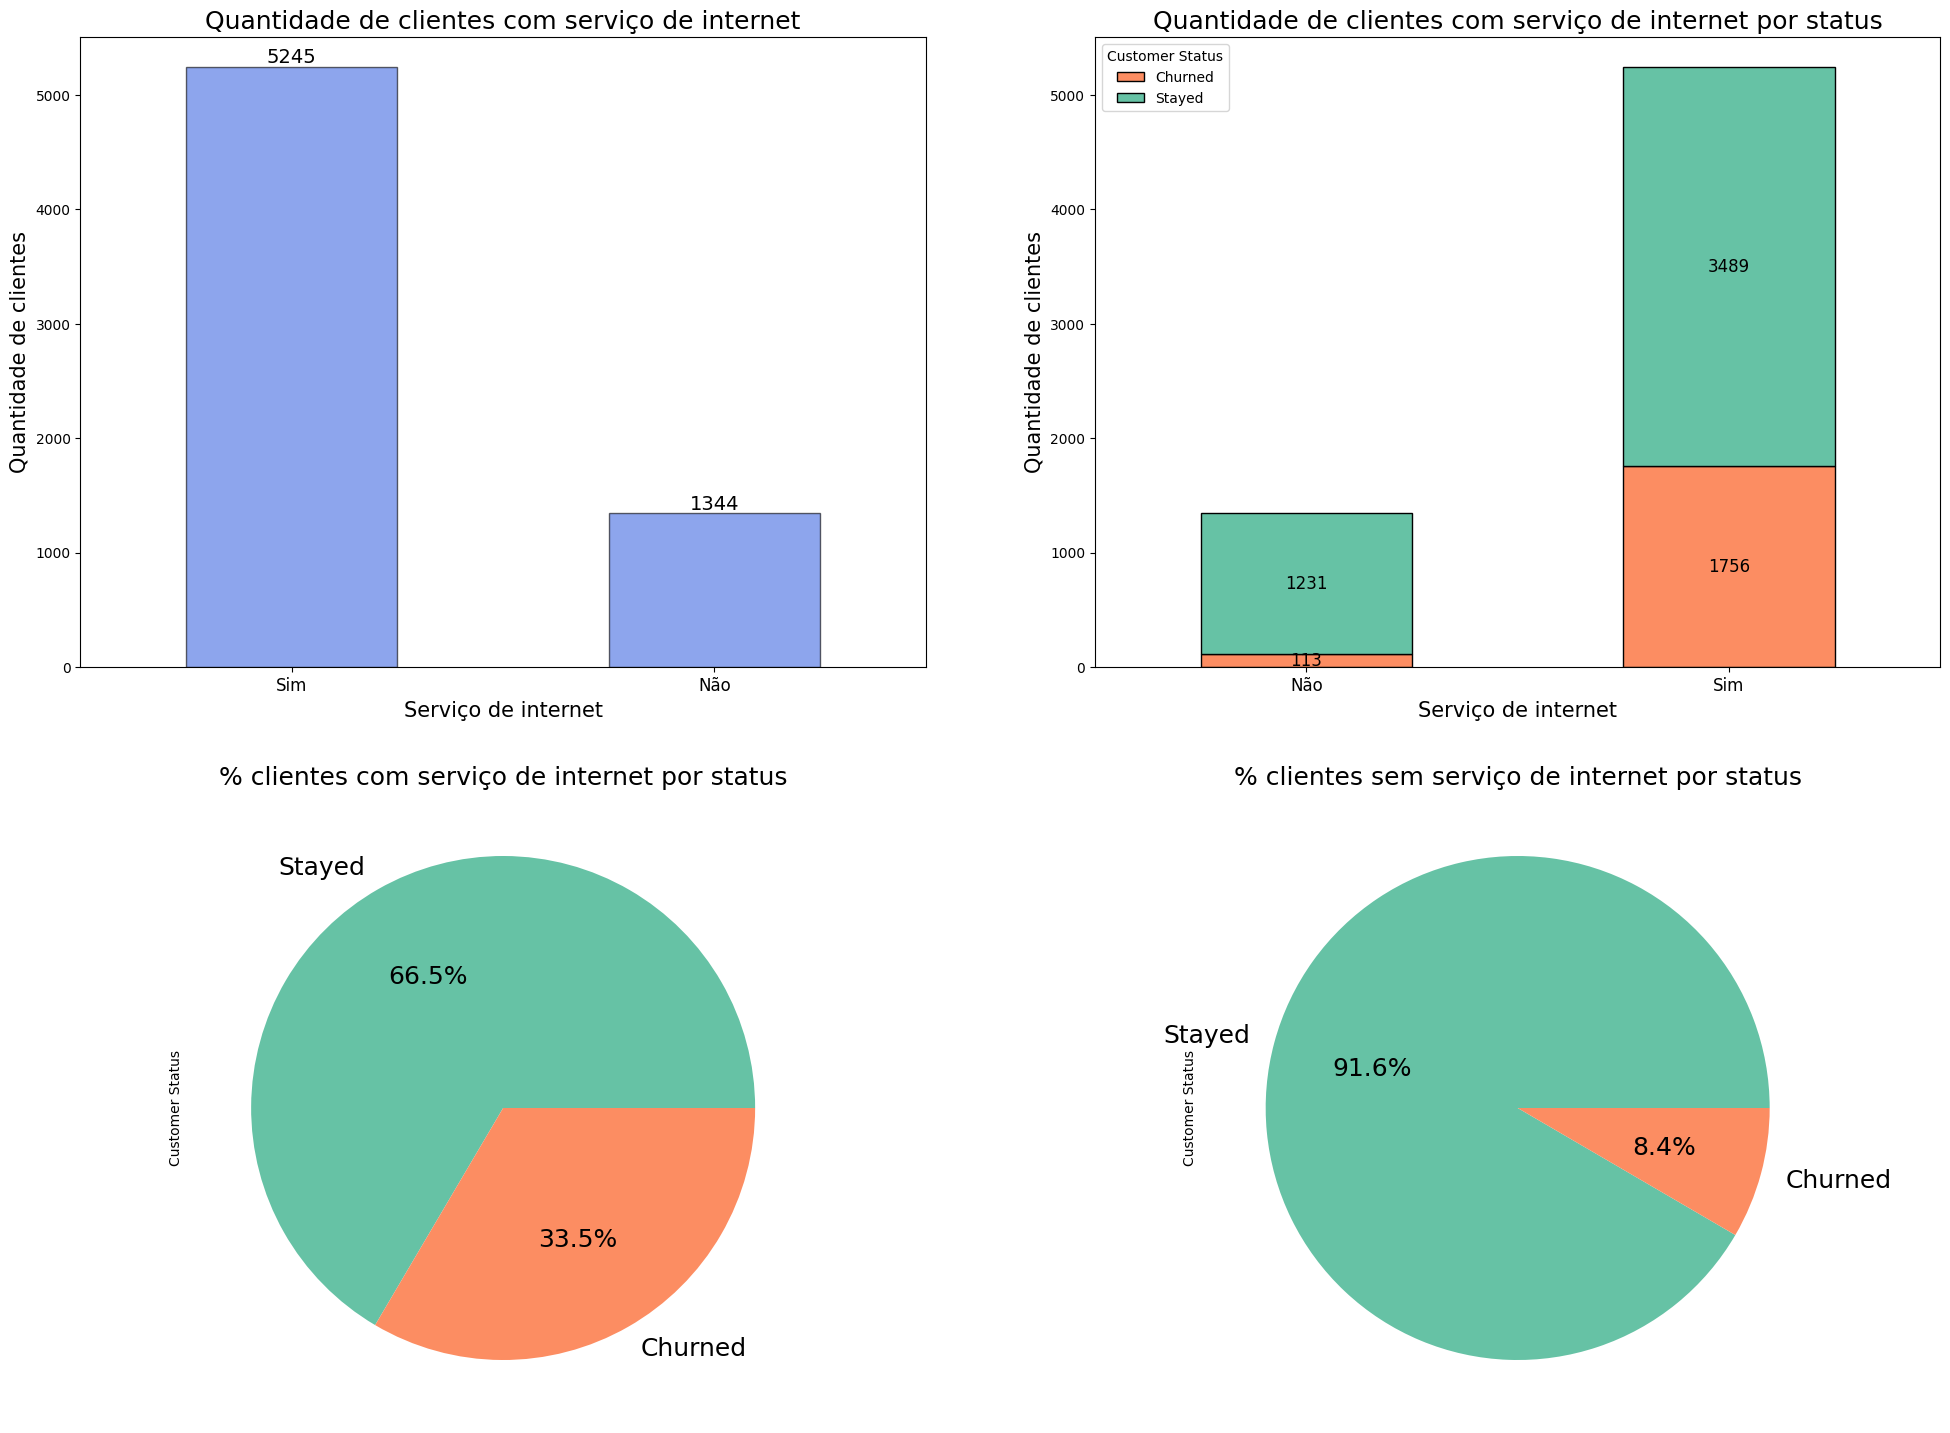

In [735]:
# Prepara a figura com largura 24 e altura 18 (em polegadas)
fig = plt.figure(figsize = (24, 18))


# Indica que estamos definindo o primeiro gráfico da figura
ax1 = fig.add_subplot(2, 2, 1)
# Contagem dos valores presentes nas categorias da coluna Internet Service
# e armazenamento na variável "Internet_Service"
Internet_Service = telecom['Internet Service'].value_counts()
# Renomeando as categorias da variável Internet_Service
Internet_Service.rename({'Yes':'Sim',
                     'No':'Não'},
                     inplace = True)
# Plota o gráfico de barras com a quantidade de clientes por instância da
# coluna Internet Service na primeira posição da figura
Internet_Service.plot.bar(color = 'royalblue',ec = "k", alpha = .6)
# Acrescenta título no eixo x
ax1.set_xlabel('Serviço de internet', fontsize=15)
# Acrescenta rótulos no eixo x
ax1.tick_params(axis="x", labelsize=12, rotation = 360)
# Acrescenta título no eixo y
ax1.set_ylabel('Quantidade de clientes', fontsize=15)
# Acrescenta título no gráfico de barras
ax1.set_title("Quantidade de clientes com serviço de internet", fontsize = 18)
# Acrescenta valor no gráfico de barras
ax1.bar_label(ax1.containers[0], fmt="%.0f", fontsize = 14)


# Indica que estamos definindo o segundo gráfico da figura
ax2 = fig.add_subplot(2, 2, 2)
# Contagem dos valores presentes nas categorias da coluna Internet Service agrupados de acordo
# com os Status do Cliente (variável de interesse) e armazenamento na variável "Internet_Service_Status"
Internet_Service_Status = telecom['Customer Status'].groupby(telecom['Internet Service']).value_counts()
# Renomeando as categorias da variável Internet_Service_Status
Internet_Service_Status.rename({'Yes':'Sim',
                             'No':'Não',
                             },
                            inplace = True)
# Plota o gráfico de barras com a quantidade de clientes por
# instância da coluna Internet Service, agrupados por status
Internet_Service_Status.unstack().plot.bar(color= ['#fc8d62','#66c2a5'], ec = 'k', stacked = True, ax = ax2 )
# Acrescenta título no eixo x
ax2.set_xlabel('Serviço de internet', fontsize=15)
# Acrescenta rótulos no eixo x
ax2.tick_params(axis="x", labelsize=12, rotation = 360)
# Acrescenta título no eixo y
ax2.set_ylabel('Quantidade de clientes', fontsize=15)
# Acrescenta título no gráfico de barras
ax2.set_title("Quantidade de clientes com serviço de internet por status", fontsize = 18)
# Acrescenta valor no gráfico de barras
ax2.bar_label(ax2.containers[0], fmt="%.0f", fontsize = 12, label_type = 'center')
ax2.bar_label(ax2.containers[1], fmt="%.0f", fontsize = 12, label_type = 'center')


# Indica que estamos definindo o terceiro gráfico da figura
ax3 = fig.add_subplot(2, 2, 3)
# Criando dataset para separar apenas os clientes que usam serviço de internet
Yes_Internet_Service = telecom[telecom["Internet Service"]== "Yes"]
# Contagem dos valores presentes nas categorias da coluna Customer Status
Internet_Service_Yes = Yes_Internet_Service['Customer Status'].value_counts()
# Plota o gráfico de pizza com o % de clientes com internet por status
Internet_Service_Yes.plot.pie(autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'], fontsize = 18, ax = ax3 )
# Acrescenta título no gráfico de barras
ax3.set_title("% clientes com serviço de internet por status", fontsize = 18)


# Indica que estamos definindo o quarto gráfico da figura
ax4 = fig.add_subplot(2, 2, 4)
# criando dataset para separar apenas os clientes que não possuem serviço de telefonia
No_Internet_Service = telecom[telecom["Internet Service"]== "No"]
# Contagem dos valores presentes nas categorias da coluna Customer Status
Internet_Service_No = No_Internet_Service['Customer Status'].value_counts()
# Plota o gráfico de pizza com o % de clientes sem internet por status
Internet_Service_No.plot.pie(autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'], fontsize = 18, ax = ax4 )
# Acrescenta título no gráfico de barras
ax4.set_title("% clientes sem serviço de internet por status", fontsize = 18)


Podemos observar que as classes do atributo “Internet Service” têm um comportamento semelhante ao observado na "Phone Service", pois também estão desbalanceadas, com maior quantidade de clientes com serviço de internet do que sem. Do mesmo modo, há mais clientes que mantiveram seus produtos do que cancelaram em ambas as classes.
Em porcentagens, porém, fica mais claro que, proporcionalmente, a quantidade de clientes que cancelaram seus produtos é maior entre aqueles que possuem serviço de internet.

Vamos repetir as visualizações considerando os clientes pouco fidelizados (que possuem apenas serviço de internet ou possuem apenas serviço de telefonia) e plotar as visualizações com os clientes que são altamente fidelizados (possuem os dois produtos) para comparar como está a distribuição por status entre esses tipos de comportamento.


Text(0.5, 1.0, '% clientes altamente fidelizados por status')

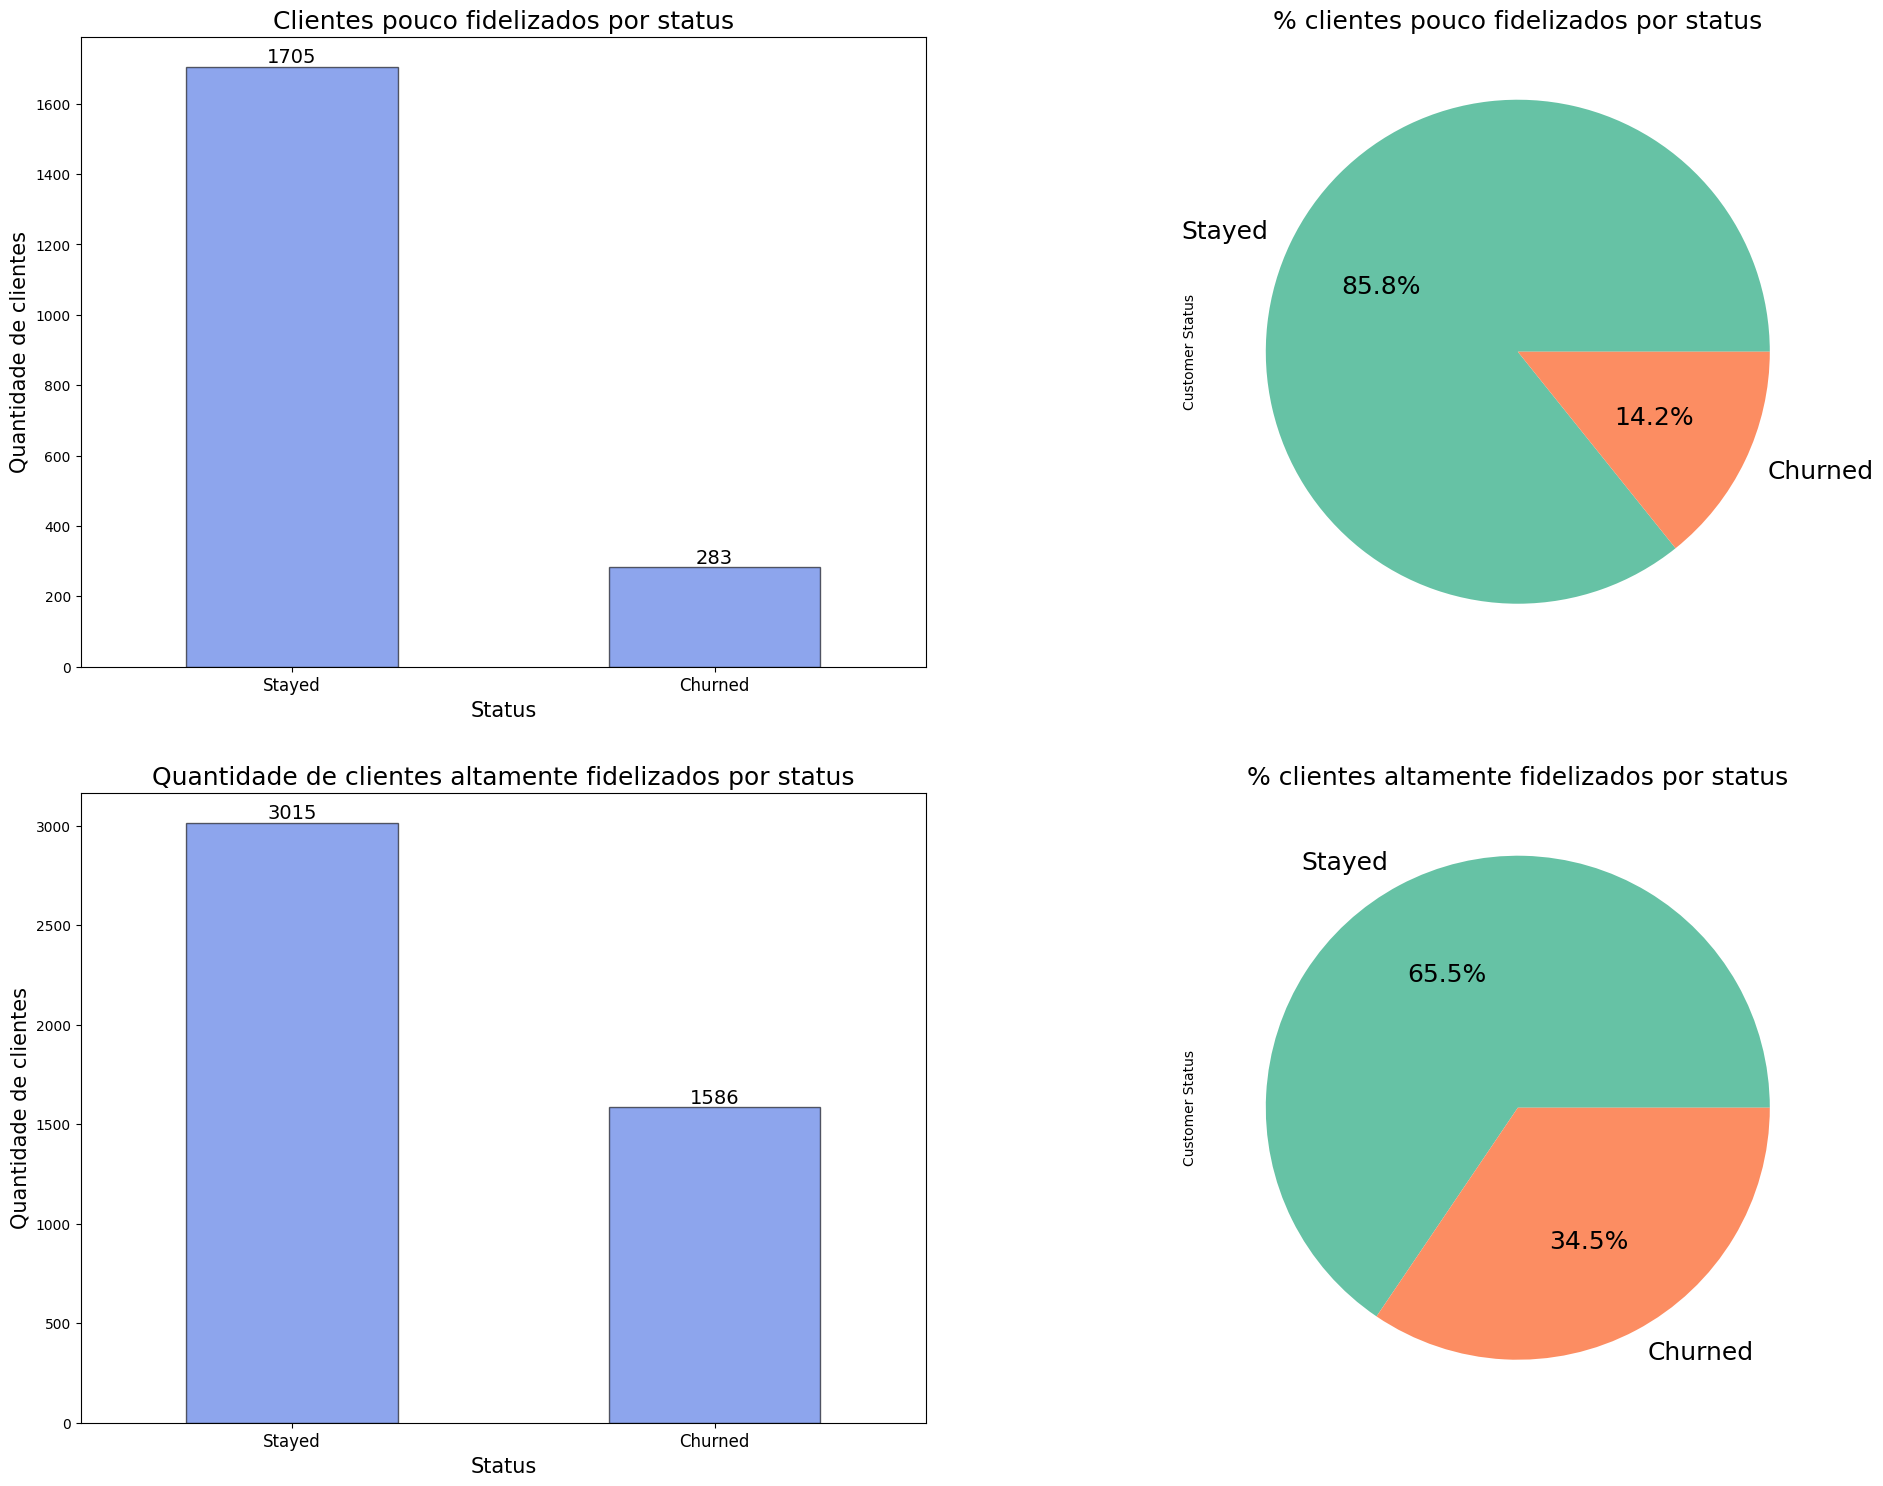

In [736]:
# Prepara a figura com largura 24 e altura 18 (em polegadas)
fig = plt.figure(figsize = (24, 18))


# Indica que estamos definindo o primeiro gráfico da figura
ax1 = fig.add_subplot(2, 2, 1)
# Definindo apenas clientes pouco fidelizados
One_Service = telecom[((telecom['Phone Service']=='No') & (df['Internet Service']=='Yes')) | ((telecom['Phone Service']=='Yes') & (df['Internet Service']=='No'))]
# Contagem dos valores presentes nas categorias da coluna Customer Status
# e armazenamento na variável "One_Service_Churn"
One_Service_churn = One_Service['Customer Status'].value_counts()
# Plota o gráfico de barras com a quantidade de clientes por instância da
# coluna Customer Status na primeira posição da figura
One_Service_churn.plot.bar(color = 'royalblue',ec = "k", alpha = .6)
# Acrescenta título no eixo x
ax1.set_xlabel('Status', fontsize=15)
# Acrescenta rótulos no eixo x
ax1.tick_params(axis="x", labelsize=12, rotation = 360)
# Acrescenta título no eixo y
ax1.set_ylabel('Quantidade de clientes', fontsize=15)
# Acrescenta título no gráfico de barras
ax1.set_title("Clientes pouco fidelizados por status", fontsize = 18)
# Acrescenta valor no gráfico de barras
ax1.bar_label(ax1.containers[0], fmt="%.0f", fontsize = 14)


# Indica que estamos definindo o segundo gráfico da figura
ax2 = fig.add_subplot(2, 2, 2)
# Plota o gráfico de pizza com o % de clientes pouco fidelizados por status
One_Service_churn.plot.pie(autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'], fontsize = 18, ax = ax2 )
# Acrescenta título no gráfico de pizza
ax2.set_title("% clientes pouco fidelizados por status", fontsize = 18)


# Indica que estamos definindo o terceiro gráfico da figura
ax3 = fig.add_subplot(2, 2, 3)
# Definindo apenas clientes altamente fidelizados
Both_Service = telecom[((telecom['Phone Service']=='Yes') & (df['Internet Service']=='Yes'))]
# Contagem dos valores presentes nas categorias da coluna Customer Status
# e armazenamento na variável "Both_Churn"
Both_churn = Both_Service['Customer Status'].value_counts()
# Plota o gráfico de barras com a quantidade de clientes por instância da coluna Customer Status
# na primeira posição da figura
Both_churn.plot.bar(color = 'royalblue',ec = "k", alpha = .6)
# Acrescenta título no eixo x
ax3.set_xlabel('Status', fontsize=15)
# Acrescenta rótulos no eixo x
ax3.tick_params(axis="x", labelsize=12, rotation = 360)
# Acrescenta título no eixo y
ax3.set_ylabel('Quantidade de clientes', fontsize=15)
# Acrescenta título no gráfico de barras
ax3.set_title("Quantidade de clientes altamente fidelizados por status", fontsize = 18)
# Acrescenta valor no gráfico de barras
ax3.bar_label(ax3.containers[0], fmt="%.0f", fontsize = 14)


# Indica que estamos definindo o quarto gráfico da figura
ax4 = fig.add_subplot(2, 2, 4)
# Plota o gráfico de pizza com o % de clientes altamente fidelizados por status
Both_churn.plot.pie(autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'], fontsize = 18, ax = ax4 )
# Acrescenta título no gráfico de pizza
ax4.set_title("% clientes altamente fidelizados por status", fontsize = 18)



Observamos que há mais cliente altamente fidelizados (4601) que clientes pouco fidelizados (1988). Entre os dois grupos, há mais clientes que permaneceram com seus serviços do que cancelaram.

Porém, entre os clientes altamente fidelizados, o percentual de churn foi mais significativo, o que pode indicar que existe a possibilidade de a primeira hipótese não se confirmar.

Após essa análise inicial, vamos realizar o tratamento de dados do dataset.

# 5) Pré processamento de dados


## 5.1) Tratamento de missing
Para iniciar a etapa de pré procesamento de dados, vamos tratar os valores faltantes do dataset.


In [737]:
# verificando nulls no dataset
telecom.isnull().sum()

Gender                                  0
Age                                     0
City                                    0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     644
Multiple Lines                        644
Internet Service                        0
Internet Type                        1344
Avg Monthly GB Download              1344
Online Security                      1344
Online Backup                        1344
Device Protection Plan               1344
Premium Tech Support                 1344
Streaming TV                         1344
Streaming Movies                     1344
Streaming Music                      1344
Unlimited Data                       1344
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                    

<Axes: >

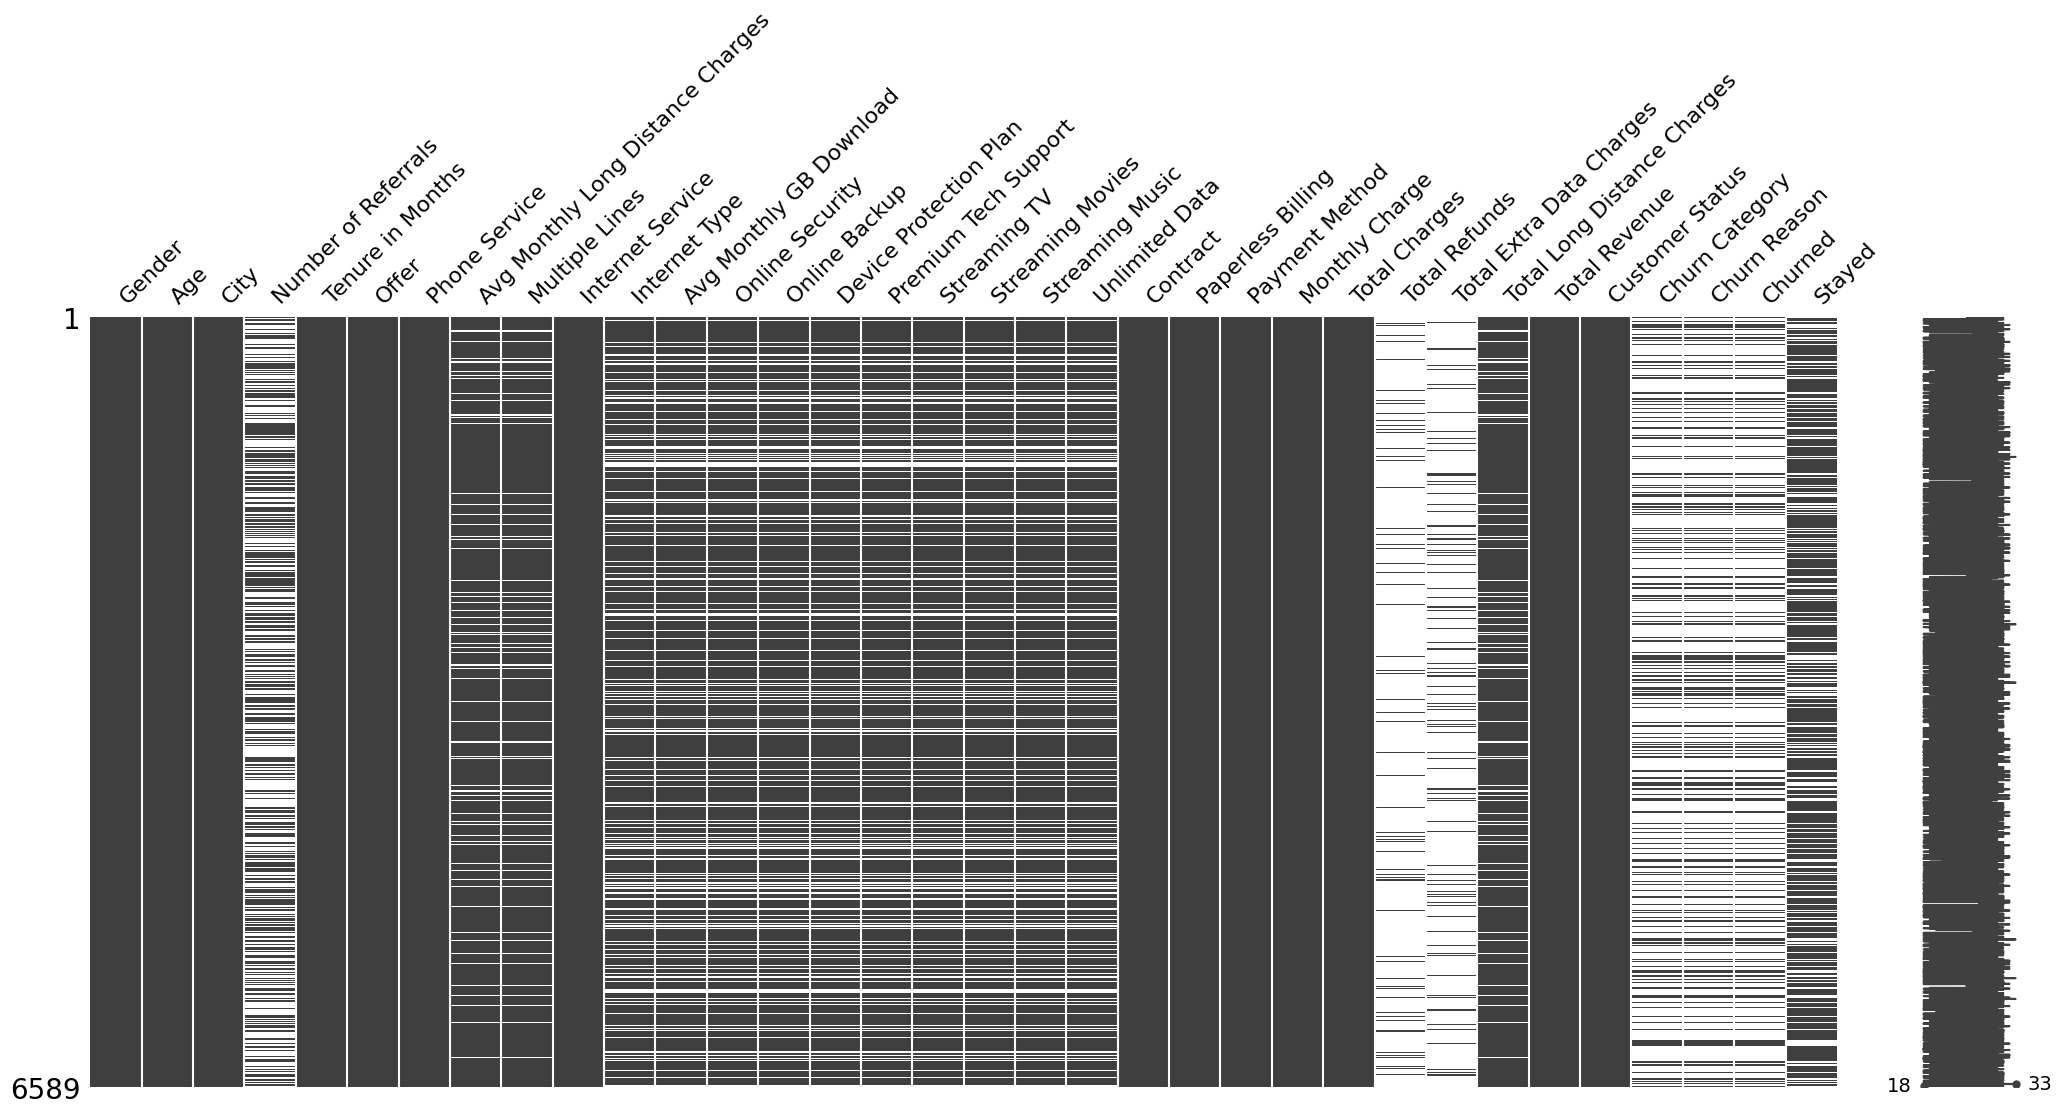

In [738]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(telecom.columns)

# o novo dataset irá conter todas as colunas do dataset original
datasetSemMissings = telecom[col[:]]

# substituindo os zeros por NaN
datasetSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

Podemos observar as colunas que possuem valores faltantes pela presença de linhas brancas. No dataset, as colunas referentes ao uso de telefonia (Ex: Multiple Lines) estão com valores em branco nos clientes que não possuem esse tipo de serviço. O mesmo ocorre para os atributos referentes ao produto internet (Ex: Streaming Music), para aqueles que não contrataram esse serviço. Vamos então substituir os missings pelos valores mais adequados para cada coluna.

In [739]:
# substituindo os NAs por 0 nas colunas nas quais os dados coletados podem assumir esse valor
# observando o banco de dados, as colunas com valores missing relacionadas ao uso de internet
# estão em branco devido aos clientes não possuírem esse serviço
# o mesmo é observado para o as colunas relacionadas ao uso de telefonia
# então vamos criar novas categorias para sinalizar esses casos

datasetSemMissings['Number of Referrals'].fillna(0, inplace = True)
datasetSemMissings['Avg Monthly Long Distance Charges'].fillna(0, inplace = True)
datasetSemMissings['Multiple Lines'].fillna('No phone service', inplace = True)
datasetSemMissings['Internet Type'].fillna('No internet', inplace = True)
datasetSemMissings['Avg Monthly GB Download'].fillna(0, inplace = True)
datasetSemMissings['Online Security'].fillna('No internet', inplace = True)
datasetSemMissings['Online Backup'].fillna('No internet', inplace = True)
datasetSemMissings['Device Protection Plan'].fillna('No internet', inplace = True)
datasetSemMissings['Premium Tech Support'].fillna('No internet', inplace = True)
datasetSemMissings['Streaming TV'].fillna('No internet', inplace = True)
datasetSemMissings['Streaming Movies'].fillna('No internet', inplace = True)
datasetSemMissings['Streaming Music'].fillna('No internet', inplace = True)
datasetSemMissings['Unlimited Data'].fillna('No internet', inplace = True)
datasetSemMissings['Total Refunds'].fillna(0, inplace = True)
datasetSemMissings['Total Long Distance Charges'].fillna(0, inplace = True)
datasetSemMissings['Total Extra Data Charges'].fillna(0, inplace = True)
datasetSemMissings['Churn Category'].fillna('No churn', inplace = True)
datasetSemMissings['Churn Reason'].fillna('No churn', inplace = True)
datasetSemMissings['Churned'].fillna('0', inplace = True)
datasetSemMissings['Stayed'].fillna('0', inplace = True)


Vamos plotar novamente a matriz para observar se os valores foram devidamente preenchidos.

<Axes: >

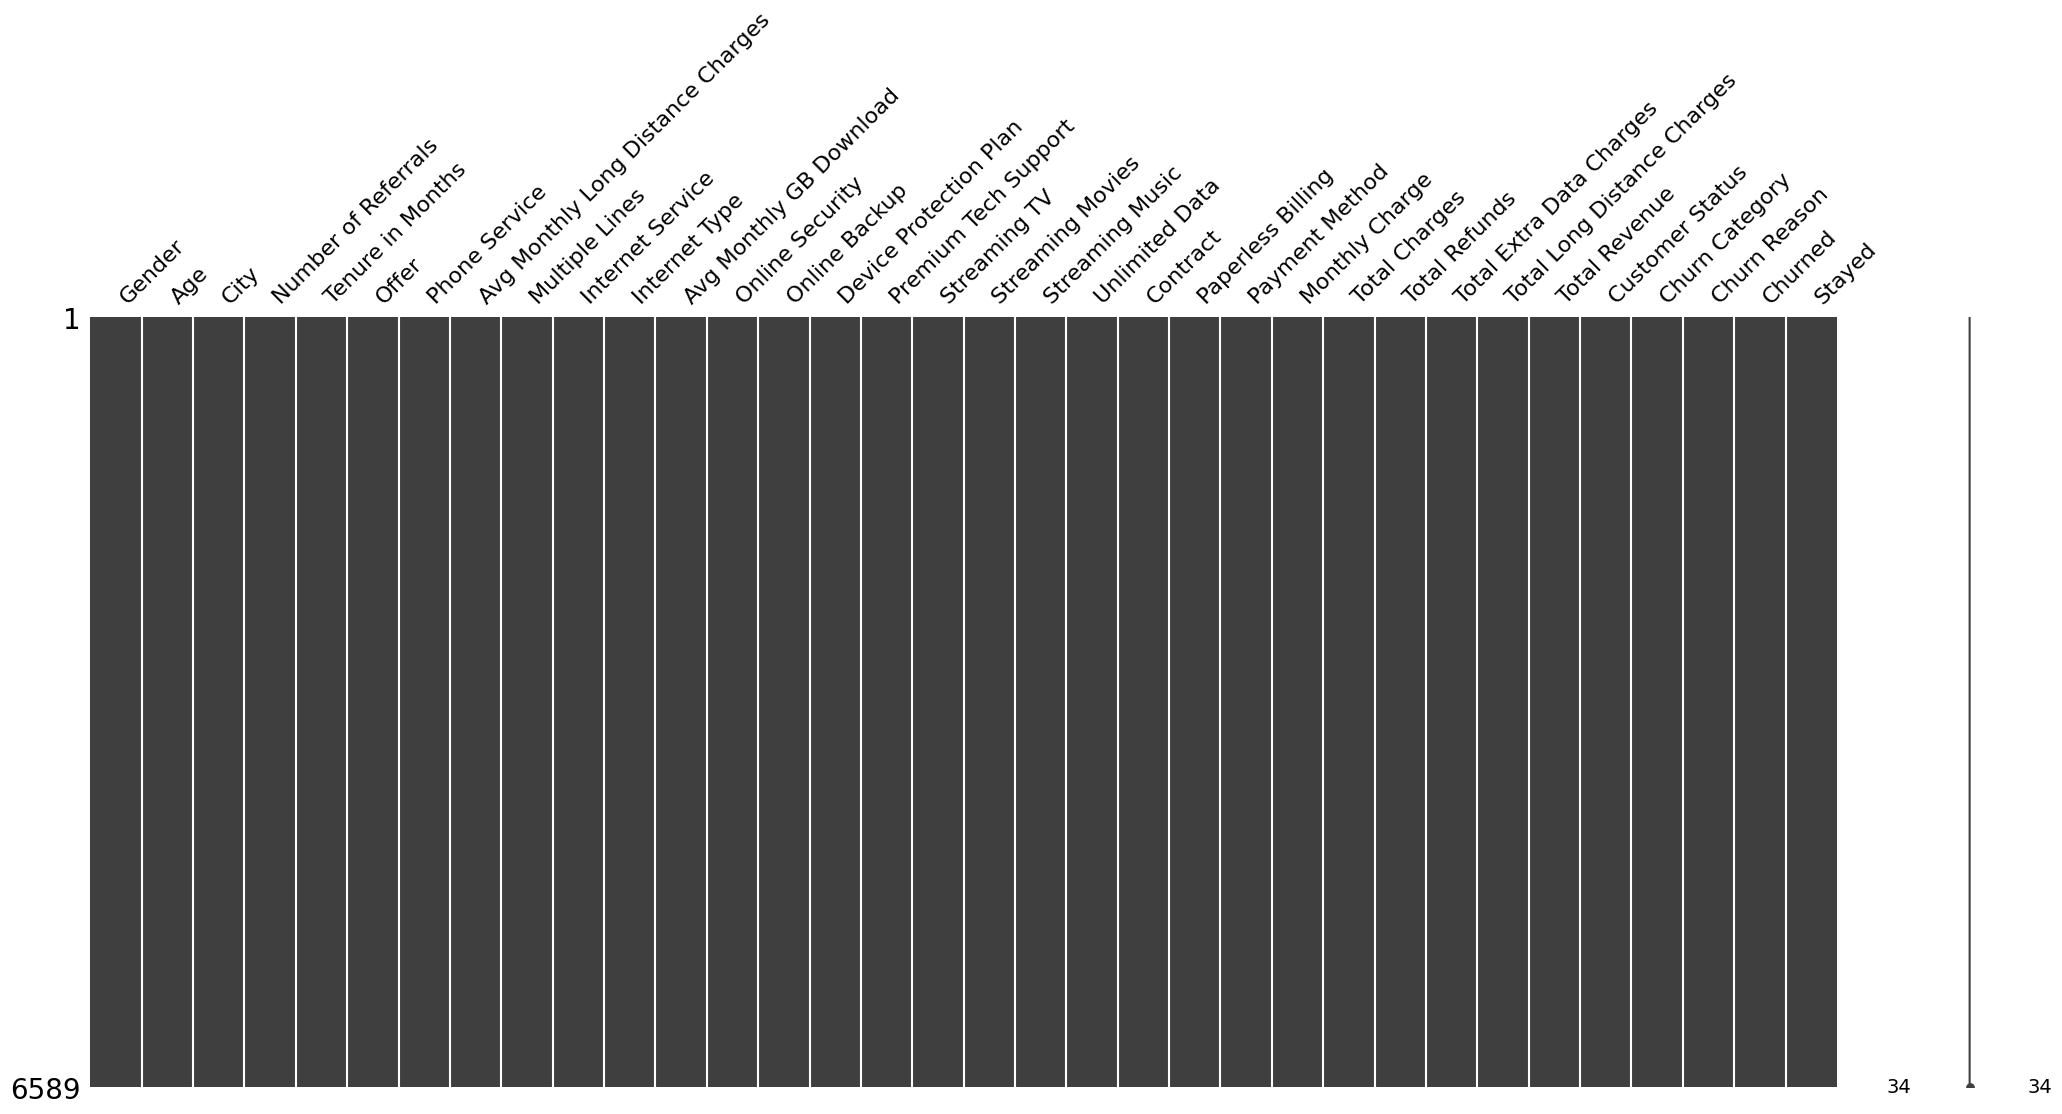

In [740]:
# verificando nulls no dataset
datasetSemMissings.isnull().sum()

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

Vimos que não há mais valores faltantes nas colunas do dataset.

## 5.2) Transformação de variáveis categóricas
Agora, vamos transformar as colunas de variáveis categóricas por variáveis numéricas, para posteriormente facilitar a criação do modelo de aprendizado. Para isso, iremos inicialmente observar os valores únicos assumidos em cada coluna.

In [741]:
# salvando um novo dataset para substituição de variáveis categóricas por numéricas

# recuperando os nomes das colunas
col = list(datasetSemMissings.columns)

# o novo dataset irá conter todas as colunas do dataset sem missing
dataset_numerico = datasetSemMissings[col[:]]

# conferindo criação do novo dataset
dataset_numerico.head()

,Gender,Age,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Churned,Stayed
0,Female,37,Frazier Park,2.0,9,None,Yes,42.39,No,Yes,...,593.30,0.00,0.0,381.51,974.81,Stayed,No churn,No churn,0,1.0
1,Male,46,Glendale,0.0,9,None,Yes,10.69,Yes,Yes,...,542.40,38.33,10.0,96.21,610.28,Stayed,No churn,No churn,0,1.0
2,Male,50,Costa Mesa,0.0,4,Offer E,Yes,33.65,No,Yes,...,280.85,0.00,0.0,134.60,415.45,Churned,Competitor,Competitor had better devices,1.0,0
3,Male,78,Martinez,1.0,13,Offer D,Yes,27.82,No,Yes,...,1237.85,0.00,0.0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,1.0,0
4,Female,75,Camarillo,3.0,3,None,Yes,7.38,No,Yes,...,267.40,0.00,0.0,22.14,289.54,Churned,Dissatisfaction,Network reliability,1.0,0


In [742]:
#verificando valores unicos das colunas com variáveis categóricas
def unique_values_names(dataset_numerico):
    for column in dataset_numerico:
        if dataset_numerico[column].dtype=='object':
            print(f'{column}:{dataset_numerico[column].unique()}')

In [743]:
unique_values_names(dataset_numerico)

Gender:['Female' 'Male']
City:['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Kirkwood' 'Carpinteria'
 'Meadow Valley']
Offer:['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service:['Yes' 'No']
Multiple Lines:['No' 'Yes' 'No phone service']
Internet Service:['Yes' 'No']
Internet Type:['Cable' 'Fiber Optic' 'DSL' 'No internet']
Online Security:['No' 'Yes' 'No internet']
Online Backup:['Yes' 'No' 'No internet']
Device Protection Plan:['No' 'Yes' 'No internet']
Premium Tech Support:['Yes' 'No' 'No internet']
Streaming TV:['Yes' 'No' 'No internet']
Streaming Movies:['No' 'Yes' 'No internet']
Streaming Music:['No' 'Yes' 'No internet']
Unlimited Data:['Yes' 'No' 'No internet']
Contract:['One Year' 'Month-to-Month' 'Two Year']
Paperless Billing:['Yes' 'No']
Payment Method:['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Customer Status:['Stayed' 'Churned']
Churn Category:['No churn' 'Competitor' 'Dissatisfaction' 'Other' 'Price' 'Attitude']
Churn Reason:['No churn' 'Competitor 

In [744]:
# substituindo valores nas colunas de variáveis categóricas


# substituindo coluna Gender
dataset_numerico["Gender"] = np.where(dataset_numerico["Gender"] == "Female", 0, 1)

# substituindo coluna Offer
dataset_numerico["Offer"] = np.where(dataset_numerico["Offer"] == "None", 0,
                                       np.where(dataset_numerico["Offer"] == "Offer A", 1,
                                                np.where(dataset_numerico["Offer"] == "Offer B", 2,
                                                         np.where(dataset_numerico["Offer"] == "Offer C", 3,
                                                                  np.where(dataset_numerico["Offer"] == "Offer D", 4, 5)))))

# substituindo coluna Phone Service
dataset_numerico["Phone Service"] = np.where(dataset_numerico["Phone Service"] == "No", 0, 1)

# substituindo coluna Multiple Lines.
# como os valores "No" e "No phone service" indicam que o cliente não tem várias linhas telefonicas,
# vamos substituir pelo mesmo valor = 0
dataset_numerico["Multiple Lines"] = np.where(dataset_numerico["Multiple Lines"] == "No", 0,
                                                np.where(dataset_numerico["Multiple Lines"] == "No phone service", 0, 1))

# substituindo coluna Internet Service
dataset_numerico["Internet Service"] = np.where(dataset_numerico["Internet Service"] == "No", 0, 1)

# substituindo coluna Internet Type
dataset_numerico["Internet Type"] = np.where(dataset_numerico["Internet Type"] == "No internet", 0,
                                       np.where(dataset_numerico["Internet Type"] == "Cable", 1,
                                                np.where(dataset_numerico["Internet Type"] == "Fiber Optic", 2,3)))

# da mesma forma que a coluna Multiple Lines, nas colunas Online Security,
# Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV,Streaming Movies,
# Streaming Music e Unlimited Data os valores "No" e "No internet" sinalizam que os clientes não tem esses serviços
# logo, vão assumir o mesmo valor = 0

# substituindo coluna Online Security
dataset_numerico["Online Security"] = np.where(dataset_numerico["Online Security"] == "No", 0,
                                                np.where(dataset_numerico["Online Security"] == "No internet", 0, 1))

# substituindo coluna Online Backup
dataset_numerico["Online Backup"] = np.where(dataset_numerico["Online Backup"] == "No", 0,
                                                np.where(dataset_numerico["Online Backup"] == "No internet", 0, 1))

# substituindo coluna Device Protection Plan
dataset_numerico["Device Protection Plan"] = np.where(dataset_numerico["Device Protection Plan"] == "No", 0,
                                                np.where(dataset_numerico["Device Protection Plan"] == "No internet", 0, 1))

# substituindo coluna Premium Tech Support
dataset_numerico["Premium Tech Support"] = np.where(dataset_numerico["Premium Tech Support"] == "No", 0,
                                                np.where(dataset_numerico["Premium Tech Support"] == "No internet", 0, 1))

# substituindo coluna Streaming TV
dataset_numerico["Streaming TV"] = np.where(dataset_numerico["Streaming TV"] == "No", 0,
                                                np.where(dataset_numerico["Streaming TV"] == "No internet", 0, 1))

# substituindo coluna Streaming Movies
dataset_numerico["Streaming Movies"] = np.where(dataset_numerico["Streaming Movies"] == "No", 0,
                                                np.where(dataset_numerico["Streaming Movies"] == "No internet", 0, 1
                                                         ))
# substituindo coluna Streaming Music
dataset_numerico["Streaming Music"] = np.where(dataset_numerico["Streaming Music"] == "No", 0,
                                                np.where(dataset_numerico["Streaming Music"] == "No internet", 0, 1))

# substituindo coluna Unlimited Data
dataset_numerico["Unlimited Data"] = np.where(dataset_numerico["Unlimited Data"] == "No", 0,
                                                np.where(dataset_numerico["Unlimited Data"] == "No internet", 0, 1))

# substituindo coluna Contract
dataset_numerico["Contract"] = np.where(dataset_numerico["Contract"] == "One Year", 0,
                                                np.where(dataset_numerico["Contract"] == "Month-to-Month", 1, 2))

# substituindo coluna Paperless Billing
dataset_numerico["Paperless Billing"] = np.where(dataset_numerico["Paperless Billing"] == "No", 0, 1)

# substituindo coluna Payment Method
dataset_numerico["Payment Method"] = np.where(dataset_numerico["Payment Method"] == "Credit Card", 0,
                                                np.where(dataset_numerico["Payment Method"] == "Bank Withdrawal", 1, 2))

# substituindo coluna Customer Status
dataset_numerico["Customer Status"] = np.where(dataset_numerico["Customer Status"] == "Churned", 0, 1)



In [745]:
# verificando dataset após substituições
dataset_numerico.head()

,Gender,Age,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Churned,Stayed
0,0,37,Frazier Park,2.0,9,0,1,42.39,0,1,...,593.30,0.00,0.0,381.51,974.81,1,No churn,No churn,0,1.0
1,1,46,Glendale,0.0,9,0,1,10.69,1,1,...,542.40,38.33,10.0,96.21,610.28,1,No churn,No churn,0,1.0
2,1,50,Costa Mesa,0.0,4,5,1,33.65,0,1,...,280.85,0.00,0.0,134.60,415.45,0,Competitor,Competitor had better devices,1.0,0
3,1,78,Martinez,1.0,13,4,1,27.82,0,1,...,1237.85,0.00,0.0,361.66,1599.51,0,Dissatisfaction,Product dissatisfaction,1.0,0
4,0,75,Camarillo,3.0,3,0,1,7.38,0,1,...,267.40,0.00,0.0,22.14,289.54,0,Dissatisfaction,Network reliability,1.0,0


As variáveis categóricas foram substituídas com sucesso. Vamos retirar as colunas "Churned" e "Stayed" visto que agora apresentam informação em duplicidade comparada a coluna "Customer Status".

In [746]:
# retirando colunas com informações desnecessárias para essa análise
dataset_numerico = dataset_numerico.drop(columns = ["Churned", "Stayed"], axis = 0)
# verificando dataset após alteração
dataset_numerico.head()

,Gender,Age,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0,37,Frazier Park,2.0,9,0,1,42.39,0,1,...,0,65.6,593.30,0.00,0.0,381.51,974.81,1,No churn,No churn
1,1,46,Glendale,0.0,9,0,1,10.69,1,1,...,0,-4.0,542.40,38.33,10.0,96.21,610.28,1,No churn,No churn
2,1,50,Costa Mesa,0.0,4,5,1,33.65,0,1,...,1,73.9,280.85,0.00,0.0,134.60,415.45,0,Competitor,Competitor had better devices
3,1,78,Martinez,1.0,13,4,1,27.82,0,1,...,1,98.0,1237.85,0.00,0.0,361.66,1599.51,0,Dissatisfaction,Product dissatisfaction
4,0,75,Camarillo,3.0,3,0,1,7.38,0,1,...,0,83.9,267.40,0.00,0.0,22.14,289.54,0,Dissatisfaction,Network reliability


## 5.3) Tratamento de valores negativos
Como foi observado nas análises iniciais do dataset, a coluna Monthly Charge possui valor mínimo negativo, o que pode indicar um possível erro na obtenção de dados, visto não ser possível fazer uma cobrança negativa. Assim, vamos substituir os valores negativos pela média dos valores da coluna.

In [747]:
# substituindo valores negativos
dataset_numerico["Monthly Charge"] = np.where(dataset_numerico["Monthly Charge"] < 0,
                                              dataset_numerico["Monthly Charge"].mean(),
                                                dataset_numerico["Monthly Charge"])
# conferindo a substituição
dataset_numerico["Monthly Charge"].describe()


count    6589.000000
mean       66.250531
std        29.658192
min        18.250000
25%        43.300000
50%        71.050000
75%        90.400000
max       118.750000
Name: Monthly Charge, dtype: float64

Observamos que o valor mínimo da coluna foi alterado e não apresenta mais valor negativo. Também houve mudança nos valores de média, desvio padrão e nos valores que definem cada quartil, quando comparados a coluna Monthly Charge do dataset original.

# 6) Separação entre conjunto treino e conjunto teste
Iremos separar o conjunto de dados entre uma amostra para construção do modelo (80%) e uma amostra para validação posterior (20%), o que permitirá verificar a sua precisão.
Usaremos a estratégia train-test-split e inicialmente iremos sinalizar quais são as colunas de atributos (X - 0 a 28) e qual é a coluna das classes (Y - 29). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.


In [748]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = df.values
X = array[:,0:34]
y = array[:,35]
# separando os conjuntos treino e teste, vamos fazer a separação
# usando estratificação, visto que o dataset está com as classes desbalanceadas
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y)

In [749]:
# Separação em conjuntos de treino e teste (dataset após tratamentos - 4 colunas a menos)
array = dataset_numerico.values
X_dn = array[:,0:28]
y_dn = array[:,29]
# separando os conjuntos treino e teste, vamos fazer a separação
# usando estratificação, visto que o dataset está com as classes desbalanceadas
X_train_dn, X_test_dn, y_train_dn, y_test_dn = train_test_split(X_dn, y_dn,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_dn)

# 7) Conclusão
Com as análises realizadas com o dataset "telecom_customer_churn", podemos observar que o status do cliente tem uma baixa correlação positiva com os valores cobrados mensalmente, o que pode indicar que razões financeiras interferem na decisão do cliente de manter ou cancelar os seus produtos.

Também vimos que a maioria dos clientes da empresa de Telecom são altamente fidelizados. Entre eles, o percentual de churn é superior ao percentual observado naqueles pouco fidelizados, o que pode sugerir que a primeira hipótese proposta para o problema não se comprove. Ou seja, possuir mais de um produto não impede que o cliente cancele seus serviços.

Desse modo, considerando que o objetivo do modelo é prever quais usuários estão propensos ao churn e assim traçar estratégias de retenção, com as analises iniciais poderia-se sugerir que fossem ofertados planos com mensalidades reduzidas e que o foco da empresa deveria ser na garantia da qualidade dos serviços de telefonia e internet já contratados, ao invés de buscar que seus clientes se fidelizem nos dois tipos de produtos ofertados.

Por fim, com os tratamentos realizados no conjunto de dados, espera-se continuar as análises para construção do modelo de aprendizado supervisionado que predirá se um cliente tem tendência a cancelar seus produtos ou se ele permanecerá usando os serviços contratados